In [ ]:
# code source
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [2]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [3]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [ ]:
# example = X[1, :].reshape((28, 28))
# print(example.shape)
# print(y[1])

# plt.imshow(example[7:14, 7:14], cmap='gray')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  30  97 221 254 254
  254 216  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  66 177 177 244 254 253 198 187
  230 253 209   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 118 250 253 253 166 140  44   8   0
  118 253 242   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  86 178 121 121  16   0   

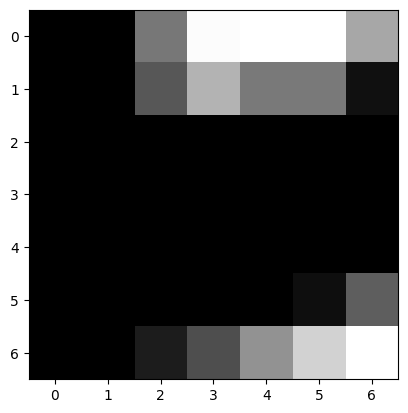

In [5]:
example = X_train[1, :].reshape((28, 28))
print(example)
plt.imshow(example[7:14, 7:14], cmap='gray')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
example = X_train[1, :].reshape((28, 28))
print(example)
plt.imshow(example[7:14, 7:14], cmap='gray')

In [ ]:
# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
# clf = LogisticRegression()
clf.fit(X_train, y_train)

In [ ]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)



In [ ]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
print(scale)

In [ ]:
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel(f"Class {i}")
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [ ]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
X.shape

In [ ]:
y.shape